In [2]:
#using Flux.Tracker
using Flux
f(x) = 3x^2 + 2x + 1

f (generic function with 1 method)

In [3]:
#f′(x) = Tracker.gradient(f, x; nest = true)[1]
f′(x) = gradient(f, x)[1]

f′ (generic function with 1 method)

In [7]:
f′(2)

14.0

In [8]:
f′′(x) = gradient(f′, x)[1]
#f′′(x) = Tracker.gradient(f′, x; nest = true)[1]

f′′ (generic function with 1 method)

In [9]:
f′′(2)

6.0

In [17]:
n = 100
x0 = range(-2,length=n,stop=2) #Julia 1.0.0以降はlinspaceではなくこの書き方になった。
a0 = 3.0
a1= 2.0
b0 = 1.0
y0 = zeros(Float32,n)
f(x0) = a0.*x0 .+ a1.*x0.^2 .+ b0 .+ 3*cos.(20*x0)
y0[:] = f.(x0)

100-element Vector{Float64}:
  0.9991858150432145
  3.0349746014923333
  4.932795573051239
  5.400528664901342
  4.034207705377236
  1.5677626380561165
 -0.5807147456717985
 -1.1856714314316843
  0.028238591025274484
  2.215928380041441
  3.9343324094524097
  4.034546595162067
  2.3721101926264203
  ⋮
 13.367879928495402
 13.510089985209987
 12.03411019822326
 10.088844651631335
  9.117358871598618
  9.964739799782746
 12.355641425934905
 15.064510735680265
 16.673255937628614
 16.447947088202753
 14.79255035906809
 12.999185815043214

In [18]:
function make_φ(x0,n,k)
    φ = zeros(Float32,k,n)
    for i in 1:k
        φ[i,:] = x0.^(i-1)
    end
    return φ
end
k = 4
φ = make_φ(x0,n,k)

4×100 Matrix{Float32}:
  1.0   1.0       1.0       1.0      …  1.0      1.0      1.0      1.0
 -2.0  -1.9596   -1.91919  -1.87879     1.87879  1.91919  1.9596   2.0
  4.0   3.84002   3.6833    3.52984     3.52984  3.6833   3.84002  4.0
 -8.0  -7.52488  -7.06895  -6.63183     6.63183  7.06895  7.52488  8.0

In [19]:
using Flux
model = Dense(k, 1) #モデルの生成。W*x + b : W[1,k],b[1]

Dense(4 => 1)       # 5 parameters

In [20]:
println("W = ",model.weight)
println("b = ",model.bias)

W = Float32[0.34396064 1.0146835 0.97817403 -0.2188078]
b = Float32[0.0]


In [21]:
loss(x, y) = Flux.mse(model(x), y) #loss関数。mseは平均二乗誤差

loss (generic function with 1 method)

In [22]:
opt = ADAM() #最適化に使う関数。ここではADAMを使用。

Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [23]:
function make_random_batch(x,y,batchsize)
    numofdata = length(y)
    A = rand(1:numofdata,batchsize) #インデックスをシャッフル
    data = []
    for i=1:batchsize
        push!(data,(x[:,A[i]],y[A[i]])) #ランダムバッチを作成。 [(x1,y1),(x2,y2),...]という形式
    end
    return data
end

make_random_batch (generic function with 1 method)

100-th loss = 5.376166538172401
200-th loss = 4.823369984702586
300-th loss = 4.697969341681274
400-th loss = 4.64426196161689
500-th loss = 4.5774700608899
600-th loss = 4.546772985983407
700-th loss = 4.522339414445451
800-th loss = 4.503736342129851
900-th loss = 4.488843464651836
1000-th loss = 4.4801671951281605
1100-th loss = 4.470240224124864
1200-th loss = 4.468897635175381
1300-th loss = 4.460274537689984
1400-th loss = 4.4686064739828
1500-th loss = 4.458631910589756
1600-th loss = 4.453404404809699
1700-th loss = 4.454203595309519
1800-th loss = 4.452107963515446
1900-th loss = 4.45811853242456
2000-th loss = 4.453244903039595
Float32[0.6354442 2.9462705 2.0333967 0.029079903]
Float32[0.2914821]


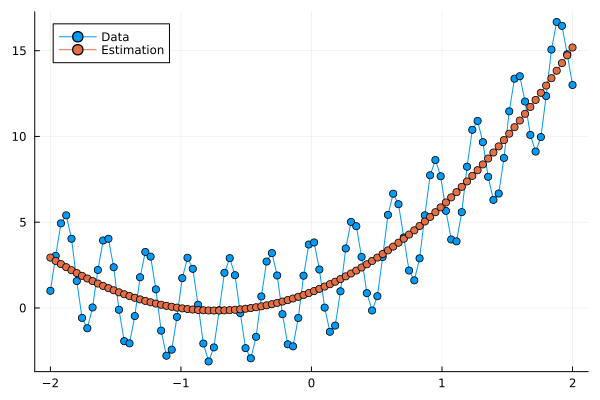

In [24]:
function train_batch!(xtest,ytest,model,loss,opt,nt)
    for it=1:nt
        data = make_random_batch(xtest,ytest,batchsize)
        Flux.train!(loss, Flux.params(model),data, opt)
        if it% 100 == 0
            lossvalue = 0.0
            for i=1:length(ytest)                
                lossvalue += loss(xtest[:,i],ytest[i])
            end
            println("$(it)-th loss = ",lossvalue/length(y0))
        end
    end
end

batchsize = 20
nt = 2000
train_batch!(φ,y0,model,loss,opt,nt) #学習

println(model.weight) #W
println(model.bias) #b

#Wとbを使って予測値を作る。
ye = [model(φ[:,i])[1] for i=1:length(y0)]
#以下はプロット。
using Plots
ENV["PLOTS_TEST"] = "true"
pls = plot(x0,[y0[:],ye[:]],marker=:circle,label=["Data" "Estimation"])
savefig("comparison_Flux.png")
plot(x0,[y0[:],ye[:]],marker=:circle,label=["Data" "Estimation"])
